# Prova 2:Exercicio 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab


<img src="controle.png" width=400 alt="Problema">

$ y_p = - n_1 \cdot \frac{s + n_2}{s^2 + n_3 \cdot s + n_4} \cdot u_p $,

sendo NUSP= 11800910, $n_1 = 9$, $n_2 = 8$, $n_3 = 1$ e $n_4 = 0$

Logo: 
$ y_p = - 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s} \cdot r $

com modelo de referência: $y_m = \frac{4}{s + 5} \cdot r$


In [215]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftp = -n1 * (s + n2) / (s**2 + n3*s + n4)

ftm = 4 / (s + 5)

ftp

TransferFunction(array([ -8, -56]), array([1, 6, 6]))

In [216]:
# Parâmetros de simulação
N = 50
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

# r = np.ones(len(T))  # referência
r = 0.1*np.cos(np.pi*T/7) + 0.05*np.sin(np.pi*T/5)

len(T)

5001

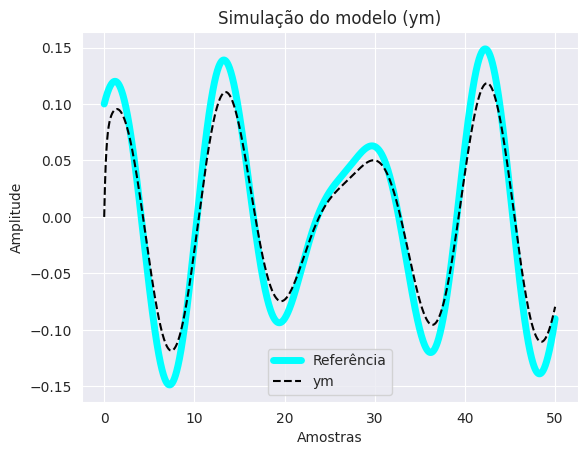

In [217]:
# Simulação dos modelos
ym, T, _ = matlab.lsim(ftm, r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], ym[:corte], label='ym', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (ym)')

plt.legend()
plt.show()

$(1 - \theta _1 ^* \cdot \frac{1}{s+2}) \cdot (\frac{-9 \cdot s - 72}{s^2 + s }) = c_0 ^* \cdot r + (\theta _3 ^* + \theta _2 ^* \cdot \frac{1}{s+2})\cdot y_p$

In [218]:


ftx = (-1/2*((s+2)/(s+7))*ftp)/(1-ftp*((4*s+16)/(32*(s+7))))

ftx

TransferFunction(array([1.2800e+02, 2.8160e+03, 2.2912e+04, 8.3968e+04, 1.3440e+05,
       7.5264e+04]), array([    32,    864,   9248,  49632, 138560, 186816,  94080]))

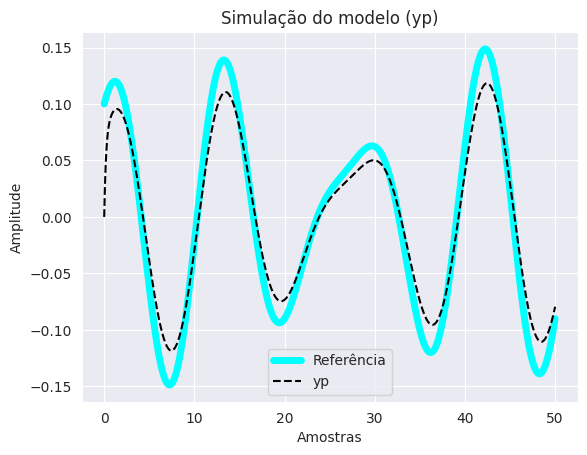

In [219]:
yp, T, _ = matlab.lsim(ftx, r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (yp)')

plt.legend()
plt.show()

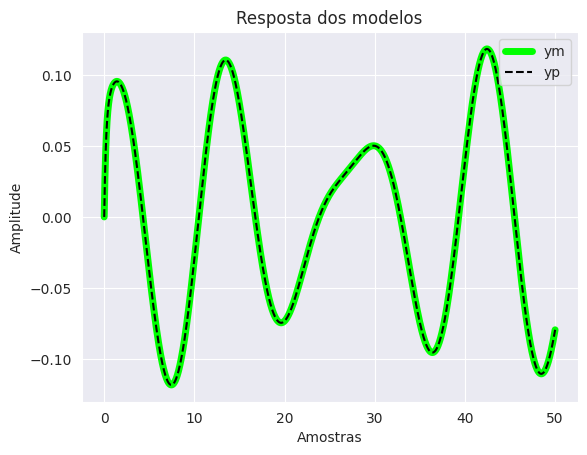

In [220]:
# Gráfico das respostas de yp e ym com entrada de referência r
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], ym[:corte], label='ym', color='lime', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Resposta dos modelos')

plt.legend()

plt.show()
